## Question 2

### Train a LSTM based model for the same sentiment analysis problem.
- Build and train a LSTM model using basic layers from the framework.
- Test model on the test set using suitable evaluation metrics.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import tensorflow as tf
from datasets import load_dataset
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import string

2025-03-24 18:00:07.428566: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 18:00:07.437016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742819407.447367   14879 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742819407.450347   14879 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-24 18:00:07.461052: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
import os

# Load dataset
train_dir = 'sst2_sentiment_dataset/sst2_train.parquet'
val_dir = 'sst2_sentiment_dataset/sst2_valid.parquet'



train_df = pd.read_parquet(train_dir)
val_df = pd.read_parquet(val_dir)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67349 entries, 0 to 67348
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idx       67349 non-null  int32 
 1   sentence  67349 non-null  object
 2   label     67349 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idx       872 non-null    int32 
 1   sentence  872 non-null    object
 2   label     872 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 17.2+ KB


In [6]:
train_data, test_data = train_test_split(train_df, test_size=5000, random_state=42)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62349 entries, 38474 to 15795
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idx       62349 non-null  int32 
 1   sentence  62349 non-null  object
 2   label     62349 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 66730 to 9670
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idx       5000 non-null   int32 
 1   sentence  5000 non-null   object
 2   label     5000 non-null   int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 136.7+ KB


In [9]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    return text

In [10]:
# Apply preprocessing
train_data['sentence'] = train_data['sentence'].apply(preprocess_text)
test_data['sentence'] = test_data['sentence'].apply(preprocess_text)
val_df['sentence'] = val_df['sentence'].apply(preprocess_text)

In [11]:
# Tokenization
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['sentence'])

In [12]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['sentence']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['sentence']), maxlen=max_len)
X_val = pad_sequences(tokenizer.texts_to_sequences(val_df['sentence']), maxlen=max_len)

y_train = train_data['label'].values
y_test = test_data['label'].values
y_val = val_df['label'].values

In [13]:
# LSTM Model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

I0000 00:00:1742819410.296639   14879 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1223 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10


I0000 00:00:1742819412.343109   14962 cuda_dnn.cc:529] Loaded cuDNN version 90300


975/975 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7455 - loss: 0.4810 - val_accuracy: 0.8200 - val_loss: 0.4122
Epoch 2/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9259 - loss: 0.1868 - val_accuracy: 0.8268 - val_loss: 0.4075
Epoch 3/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9513 - loss: 0.1263 - val_accuracy: 0.8200 - val_loss: 0.4893
Epoch 4/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9589 - loss: 0.0991 - val_accuracy: 0.8177 - val_loss: 0.4586
Epoch 5/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9649 - loss: 0.0821 - val_accuracy: 0.8314 - val_loss: 0.5610
Epoch 6/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9677 - loss: 0.0696 - val_accuracy: 0.8222 - val_loss: 0.6263
Epoch 7/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9730 - loss: 0.0586 - val_accuracy: 0.8154 - val_loss: 0.5576
Epoch 8/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9733 - loss: 0.0555 - val_accurac

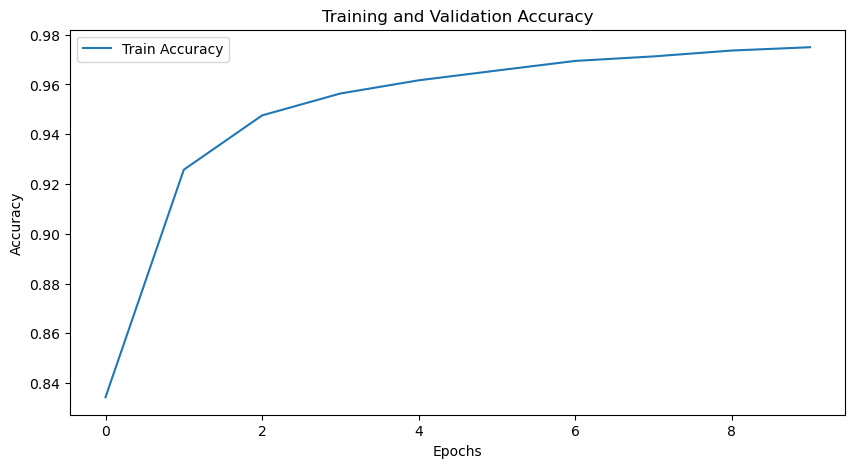

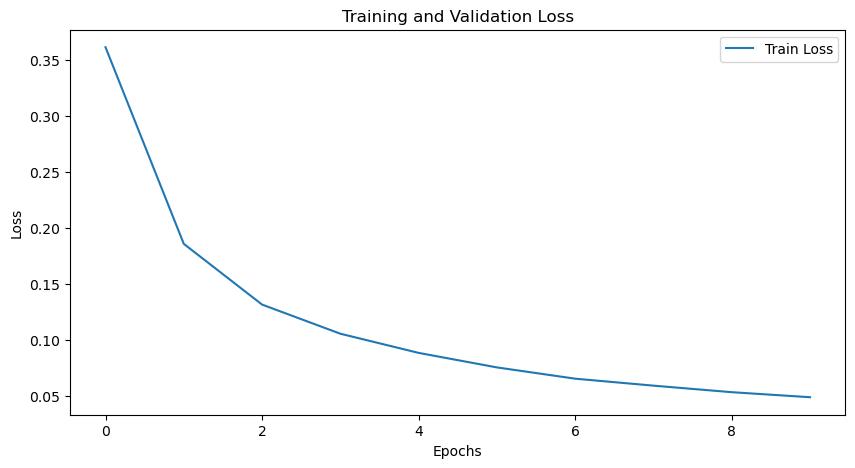

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [16]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9299 - loss: 0.3355 
Test Accuracy: 0.9262
Test Loss: 0.3582


In [17]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification with sigmoid activation)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2167
           1       0.95      0.92      0.93      2833

    accuracy                           0.93      5000
   macro avg       0.92      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

